#  <span style="color:#dc143c">Du Bois Viz Challenge 2024 </span>
<span style="color:#00aa00">**2024 Tidytuesday  Week 14** </span>

## Setup

### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rcParams
from matplotlib import font_manager

font_dirs =  ['/Library/Fonts']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

rcParams['font.family'] = 'Roboto'
#rcParams['font.size'] = '12'

### Data

In [64]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-04-02/dubois_week10.csv"
df = pd.read_csv(url)

## Data Wrangling  - EDA

In [65]:
df.rename(columns={'Occupation' : 'job',	'Percentage':'pct'}, inplace=True)
df

,job,pct
0,Teachers,58.5
1,Ministers,4.3
2,Government Service,3.2
3,Business,2.1
4,Other Professions,3.8
5,House Wives,28.1


## Viz

In [14]:
df.job.to_list()

['Teachers',
 'Ministers',
 'Government Service',
 'Business',
 'Other Professions',
 'House Wives']

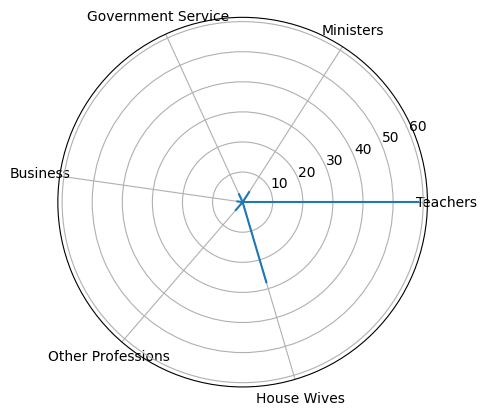

In [16]:
a = df.job
r = df.pct
plt.subplot(projection='polar')
plt.vlines(a, 0, r)
plt.show()

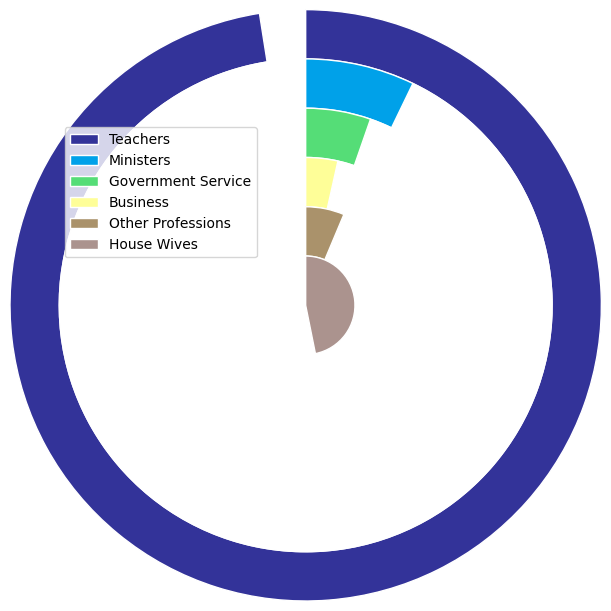

In [22]:
from matplotlib import cm
from math import log10

labels =df.job.to_list()
data = df.pct
#number of data points
n = len(data)
#find max value for full ring
k = 30 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 2
#calculate width of each ring
w = r / n 
#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]
#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.legend()
plt.show()

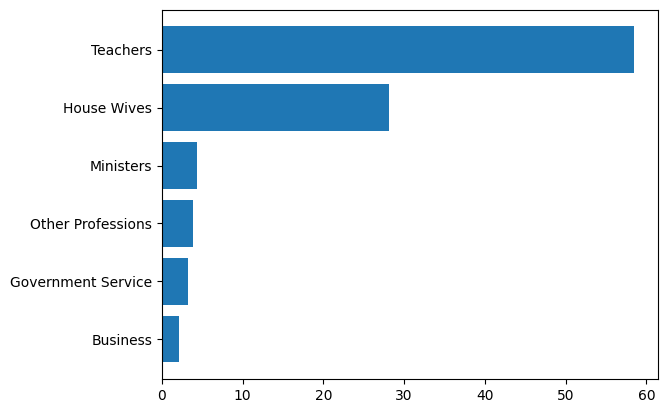

In [54]:
dfs = df.sort_values('pct')

fig, ax = plt.subplots()
ax.barh(dfs.job.to_list(),  dfs.pct.to_list(), )
plt.show()

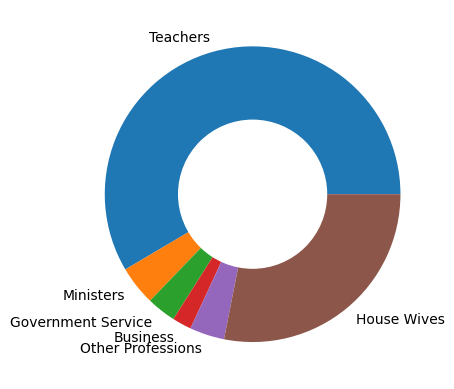

In [45]:

my_circle = plt.Circle( (0,0), 0.5, color='white')

fig, ax = plt.subplots()
ax.pie(df.pct, labels=df.job) # , colors=['red','green','blue','skyblue'])
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

### Radial Plot

**Original code snippet from:** [Andy  McDonald](https://gist.github.com/andymcdgeo)

In [84]:
df['pct'].max()
dfs

,job,pct
3,Business,2.1
2,Government Service,3.2
4,Other Professions,3.8
1,Ministers,4.3
5,House Wives,28.1
0,Teachers,58.5


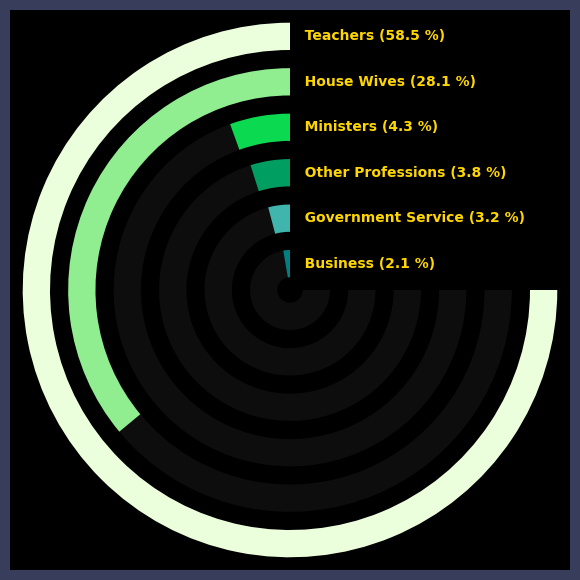

In [132]:
jobs = dfs['job']
vals = dfs['pct']
max_ring = dfs['pct'].max()
colors = ['#008080', '#40B5AD', '#009E60',  '#0BDA51', '#90EE90', '#ECFFDC']
labels =  [f'   {x} ({v} %)' for x, v in zip(list(jobs),  list(vals))]
length = len(dfs)

fig = plt.figure(figsize=(8, 8), facecolor='#393d5c')
rect = [0.1,0.1,0.7,0.7]
#sqare
ax_cart = fig.add_axes(rect, facecolor='black') #'#25253c'
ax_cart.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
ax_cart.tick_params(axis='both', left=False, bottom=False,  labelbottom=False, labelleft=False)

# radial
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
ax_polar_bg.set_theta_zero_location('N')
ax_polar_bg.set_theta_direction(1)


#polar: grey bar
for i in range(length):
    ax_polar_bg.barh(i, max_ring * 1.5 * np.pi/max_ring,  color='grey',  alpha=0.1, height=.6)

ax_polar_bg.axis('off')

# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0, 1, 2, 3, 4, 5], 
                labels= labels, 
                angle=0, 
                fontsize=10, fontweight='bold',
                color='gold', verticalalignment='center')
# values rings
for i in range(length):
    ax_polar.barh(i, list(vals)[i] * 1.5 * np.pi/max_ring, color=colors[i], height=.6)
    
# hide all grids
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=False, bottom=False, 
                   labelbottom=False, labelleft=True)



plt.show()

### Donut Plot

In [162]:
df_teachers  = dfs[dfs.job == 'Teachers']
df_teachers.pct
target = 100
actual_dft= df_teachers.pct
remain_dft = target - actual_dft
remain_dft
#dft  =  pd.DataFrame({'target': actual_dft, 'remain': remain_dft})
jobs = dfs.job.to_list()
vals  = dfs.pct.to_list()
vals[5]

58.5

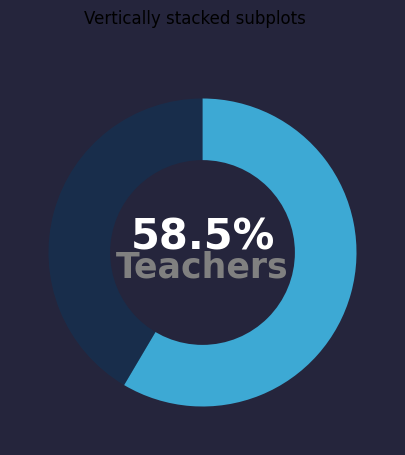

In [197]:
target = 100
actual_dft, remain_dft = vals[5] , target - actual_dft

colors = ['#3da9d4', '#063b63']

#axs = plt.subplots(ncols=2, nrows=2, figsize=(8, 5),  layout="constrained")
fig = plt.figure(figsize=(6, 5), facecolor='#25253c')
fig.suptitle('Vertically stacked subplots')
ax = fig.add_subplot(1,1,1)

pie = ax.pie([actual_dft, remain_dft],  colors=colors,  startangle=90,   labeldistance=1.15,  counterclock=False)

pie[0][1].set_alpha(0.4)

centre_circle = plt.Circle((0, 0), 0.6, fc='#25253c')

fig.gca().add_artist(centre_circle)

text1 = f'{actual_dft}%'
text2 = f'Teachers'

ax.text(0,0.1, text1, horizontalalignment='center',  verticalalignment='center',  fontsize=30, fontweight='bold', color='white')
ax.text(0,-0.1, text2, horizontalalignment='center', verticalalignment='center',  fontsize=25, fontweight='bold', color='grey')

plt.show()

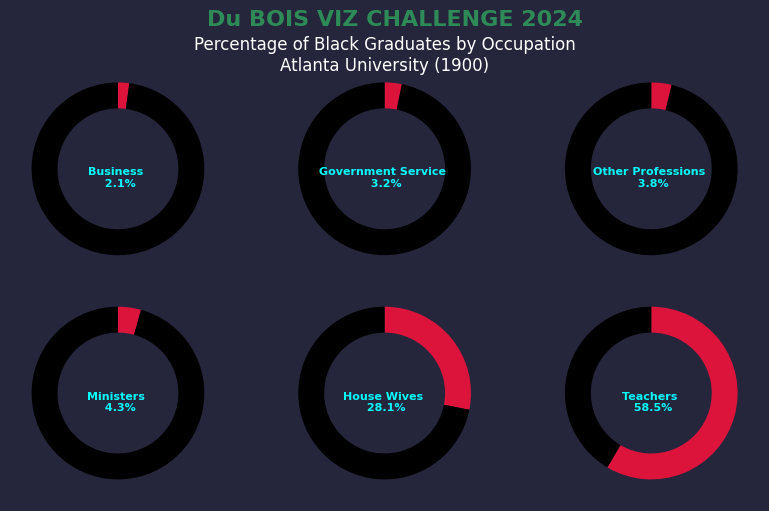

In [443]:
jobs = dfs.job.to_list()
vals  = dfs.pct.to_list()
target = 100

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(8, 5),  layout="constrained", facecolor='#25253c')

mid = (fig.subplotpars.right + fig.subplotpars.left)/2
fig.suptitle(
    'Du BOIS VIZ CHALLENGE 2024\n',
    size=16, x=mid, color = 'seagreen', weight='bold')
fig.text(
    0.5, 0.87, 
    'Percentage of Black Graduates by Occupation\nAtlanta University (1900)', 
    ha='center', fontsize=12, fontweight='light', color = 'white')

colors = ['crimson', 'black']


v = 0
for row in range(2):
    for col in range(3):
        pie = axs[row, col].pie(
            [vals[v] , target - vals[v]], colors=colors,  startangle=90,   labeldistance=1.15,   counterclock=False,
            wedgeprops=dict(width=0.3) #, autopct='%1.1f%%'
            )
        #cc  = plt.Circle((0, 0), 0.6, fc='#25253c')
        #fig = plt.gcf()
        #fig.gca().add_artist(cc)
        #text1 = f'{vals[v]}%'
        text2 = f'{jobs[v]} \n {vals[v]}%'
        #axs[row, col].text(0,0.1, text1, horizontalalignment='center',  verticalalignment='center',  fontsize=10, fontweight='bold', color='white')
        axs[row, col].text(0,-0.1, text2, horizontalalignment='center', verticalalignment='center',  fontsize=8, fontweight='bold', color='cyan')
        v += 1




plt.show()

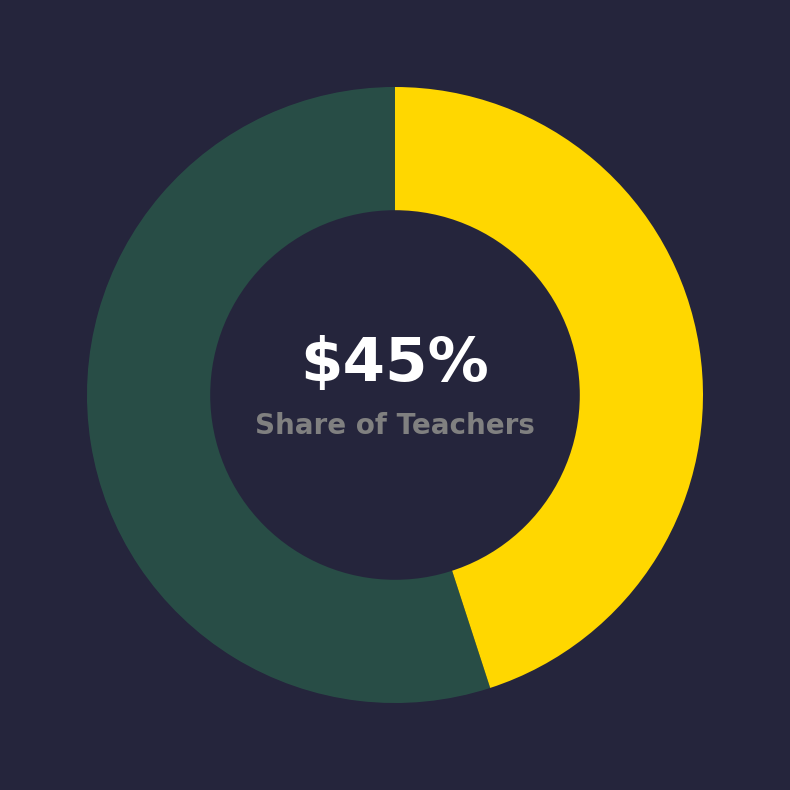

In [435]:
actual_value = 45
target_value = 100
remaining_value = target_value - actual_value

colours = ['gold', 'seagreen'] # ['#3da9d4', '#063b63']

fig = plt.figure(figsize=(10,10), facecolor='#25253c')
ax = fig.add_subplot(1,1,1)

pie = ax.pie([actual_value, remaining_value], 
        colors=colours, 
        startangle=90, 
        labeldistance=1.15, 
        counterclock=False)

# Set the alpha of segment 2
pie[0][1].set_alpha(0.4)

# Add inner circle and text
centre_circle = plt.Circle((0, 0), 0.6, fc='#25253c')

# Adding the circles to the chart
fig.gca().add_artist(centre_circle)

# Adding text to the centre of the chart
centre_text = f'${actual_value}%'
centre_text_line_2 = f'Share of Teachers'

ax.text(0,0.1, centre_text, horizontalalignment='center', 
            verticalalignment='center', 
            fontsize=44, fontweight='bold',
            color='white')
ax.text(0,-0.1, centre_text_line_2, horizontalalignment='center', 
            verticalalignment='center', 
            fontsize=20, fontweight='bold',
            color='grey')

plt.show()

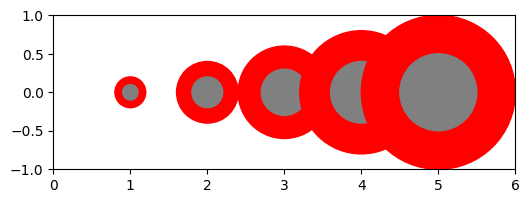

In [364]:
fig, ax = plt.subplots(figsize=(6,2))
ax.set_aspect("equal")
N = 5

circle_list = []
circle = []

circle_size = [.2,.4,.6,.8,1]
circle_x = np.arange(N)+1

for i in range(N):
    c1 = plt.Circle((circle_x[i],0), circle_size[i], color = 'red')
    c2 = plt.Circle((circle_x[i],0), circle_size[i]/2, color = 'grey')
    ax.add_artist(c1)
    ax.add_artist(c2)

plt.xlim([0,N+1])
plt.ylim([-1,1])

plt.show()

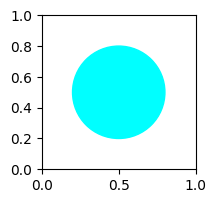

In [367]:
circle_size = .2
circle_x = .3
fig, ax = plt.subplots(figsize=(6,2))
ax.set_aspect("equal")
c1 = plt.Circle((0.5, 0.5), .3, color = 'cyan')
ax.add_artist(c1)

plt.show()

In [333]:
g = pd.DataFrame({'name' : ['A', 'B', 'C' , 'D'], 'val' : [.40,  .35,  .25, .15], 'target': [1, 1, 1, 1]})
g['remain'] =  g['target'] - g['val']
g

,name,val,target,remain
0,A,0.40,1,0.60
1,B,0.35,1,0.65
2,C,0.25,1,0.75
3,D,0.15,1,0.85


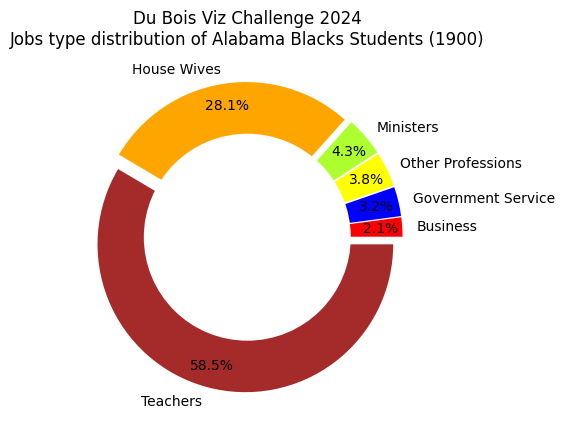

In [373]:
job = dfs.job
share = dfs.pct
colors = ['#FF0000', '#0000FF', '#FFFF00',  '#ADFF2F', '#FFA500', 'brown']
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
 
plt.pie(share, colors=colors, labels=job,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
fig.gca().add_artist(centre_circle)
 
plt.title('Du Bois Viz Challenge 2024\nJobs type distribution of Alabama Blacks Students (1900)')
 
plt.show()


In [389]:
dfs['remain'] = 100 - dfs['pct']
dfs['job']

3              Business
2    Government Service
4     Other Professions
1             Ministers
5           House Wives
0              Teachers
Name: job, dtype: object

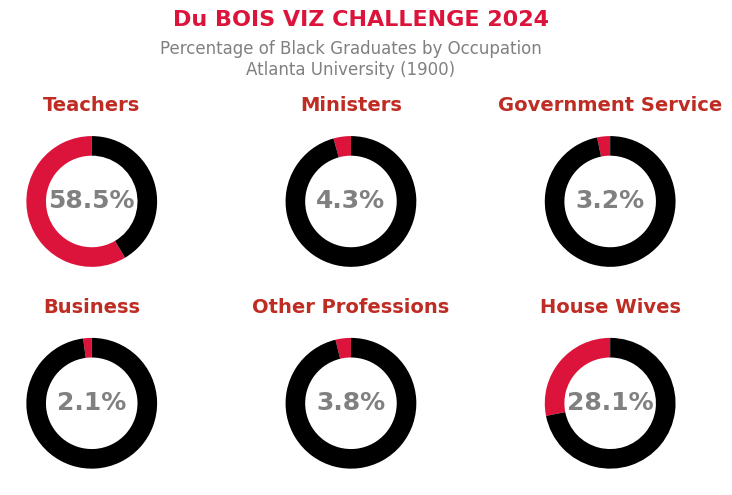

In [447]:

job = dfs['job']
pct = dfs['pct']
rem = dfs['remain']
length = len(dfs)
colors = ['crimson', 'black']

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(8, 5),  #layout="constrained"
                         )
mid = (fig.subplotpars.right + fig.subplotpars.left)/2
fig.suptitle(
    'Du BOIS VIZ CHALLENGE 2024\n\n',
    size=16, x=mid, color = 'crimson', weight='bold')
fig.text(
    0.5, 0.85, 
    'Percentage of Black Graduates by Occupation\nAtlanta University (1900)', 
    ha='center', fontsize=12, fontweight='light', color = 'grey')

# Flatten the axes array for easier iteration
axes = axes.flatten()
# Iterate over each category in 'name' and plot a donut chart
for i in range(6):
    ax = axes[i]  # Select the current axis
    
    # Plot the donut chart
    ax.pie([pct[i], rem[i]], colors=colors,
           wedgeprops=dict(width=0.3), # autopct='%1.1f%%', 
           startangle=90
           )
    lab = f'{pct[i]}%'
        #axs[row, col].text(0,0.1, text1, horizontalalignment='center',  verticalalignment='center',  fontsize=10, fontweight='bold', color='white')
    ax.text(0, 0, lab, horizontalalignment='center', verticalalignment='center',  fontsize=18, fontweight='bold', color='grey')
  
    # Set the title of the subplot as the category name
    ax.set_title(job[i], color = "#bf2c23",  fontsize=14, fontweight='bold', )


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

range(0, 4)